# Проект 2. Рекламные объявления



<div class="alert alert-block alert-danger"
<b>
    
**Задачи:**

1. Посчитать среднее количество показов и среднее количество кликов на объявления за весь период (округлить до целых)
2. Нарисовать график распределения показов на объявления за весь период.
3. Найти среднее количество показов на 1 объявление по дням, не учитывая объявления, у которых не было показов. После этого посчитать скользящее среднее по полученному результату с окном в 2 элемента.
4. Нанесите на один график значения среднего количества показов по дням и скользящего среднего на основе этих данных. Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
5. Объединить данные рекламы с данными о рекламных клиентах и найти среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.
6. Вычислить конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых.
7. Посчитать, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].
8. Построить барплот, на котором будут показаны категории с количеством уникальных клиентов в них.
</b>
</div>

In [82]:
# Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [83]:
# Считываем данные о взаимодействиях с рекламными объявлениями
ads_data = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-anasta-semenova/shared/homeworks/python_ds_miniprojects/6/ads_data.csv")
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [84]:
# Считываем данные о характеристиках рекламных клиентов
ads_clients_data = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-anasta-semenova/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv")
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


<div class="alert alert-block alert-danger"
<b>
    
1. Посчитать среднее количество показов и среднее количество кликов на объявления за весь период (округлить до целых)
</b>
</div>

In [86]:
# Сгруппируем данные по каждому объявлению и типу взаимодействия
ad_event = ads_data.groupby(['ad_id', 'event']).agg({'event': 'count'}).rename(columns={'event': 'count'}).reset_index()
ad_event.head()

,ad_id,event,count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [87]:
# Представим таблицу в более удобном виде
ad_event = ad_event.pivot(index='ad_id', columns='event', values='count')
ad_event.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0


In [88]:
# Некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Поэтому заменяем эти значения на 0
ad_event = ad_event.fillna(0).reset_index()
ad_event.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [89]:
# Среднее количество показов объявлений за весь период, округленное до целых
ad_event.click.mean().round()

113.0

In [90]:
# Среднее количество кликов на объявления за весь период, округленное до целых
ad_event.view.mean().round()

923.0

<div class="alert alert-block alert-danger"
<b>
    
2. Нарисовать график распределения показов объявлений за весь период.
</b>
</div>

In [92]:
# Настройки для отображения графика
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [93]:
# Сгруппируем данные по каждому объявлению и типу событий и посчитаем количество событий
ad_event2 = ads_data.groupby(['ad_id', 'event']).agg({'event': 'count'}).rename(columns={'event': 'count'}).reset_index()
ad_event2 = ad_event2.pivot(index='ad_id', columns='event', values='count').reset_index().dropna(0)
ad_event2.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
4,2132,1.0,58.0
6,2494,1.0,324.0


In [94]:
# Прологарифмируем число показов
ad_event2['view_log'] = np.log(ad_event2.view)
ad_event2.head()

event,ad_id,click,view,view_log
0,2,1.0,101.0,4.615121
1,3,3.0,184.0,5.214936
2,1902,1.0,41.0,3.713572
4,2132,1.0,58.0,4.060443
6,2494,1.0,324.0,5.780744


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



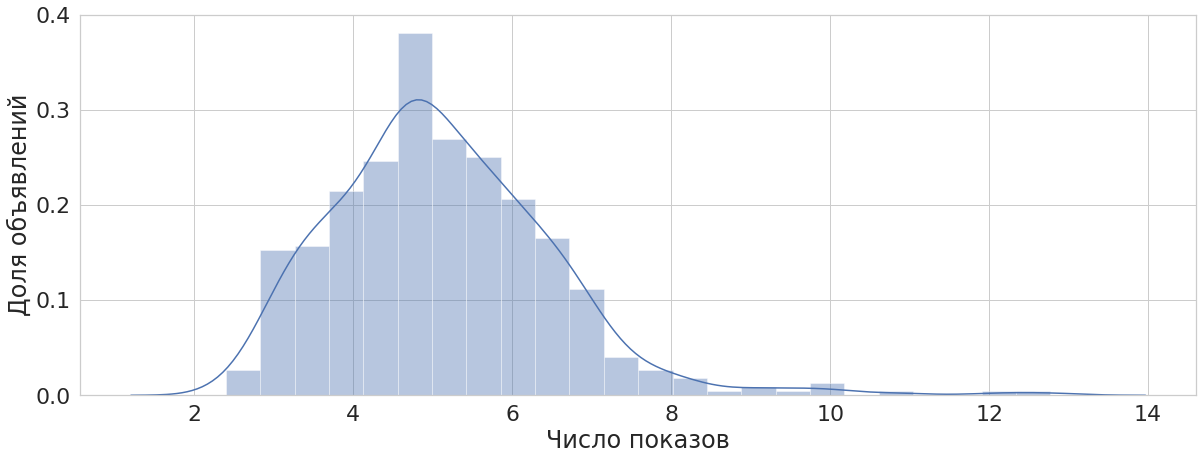

In [95]:
# Построим график
sns.distplot(ad_event2.view_log, kde = True)

plt.xlabel('Число показов')
plt.ylabel('Доля объявлений')
plt.show()

<div class="alert alert-block alert-danger"
<b>
    
3. Найти среднее количество показов на 1 объявление по дням, не учитывая объявления, у которых не было показов. После этого посчитать скользящее среднее по полученному результату с окном в 2 элемента.
</b>
</div>

In [97]:
# Уберем из данных объявления, у которых не было показов и сохраним их в отдельный датафрейм
mean_view_day = ads_data.query("event == 'view'").groupby(['date', 'ad_id'], as_index = False).agg({'event': 'count'}).dropna(0)
mean_view_day.head()

,date,ad_id,event
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17


In [154]:
# Сгруппируем данные по дате и посчитаем среднее число показов на каждый день
mean_view_all_day = mean_view_day.groupby('date', as_index = False).agg({'event': 'mean'}).rename(columns={'event': 'mean_view'})
mean_view_all_day

,date,mean_view
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [156]:
# Посчитаем скользящее среднее с окном 2 на каждый день
mean_view_all_day['mean_view_all_day_rol'] = pd.DataFrame(mean_view_all_day.mean_view.rolling(window=2).mean())
mean_view_all_day

,date,mean_view,mean_view_all_day_rol
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


<div class="alert alert-block alert-danger"
<b>
    
4. Нанесите на один график значения среднего количества показов по дням и скользящего среднего на основе этих данных. Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
</b>
</div>

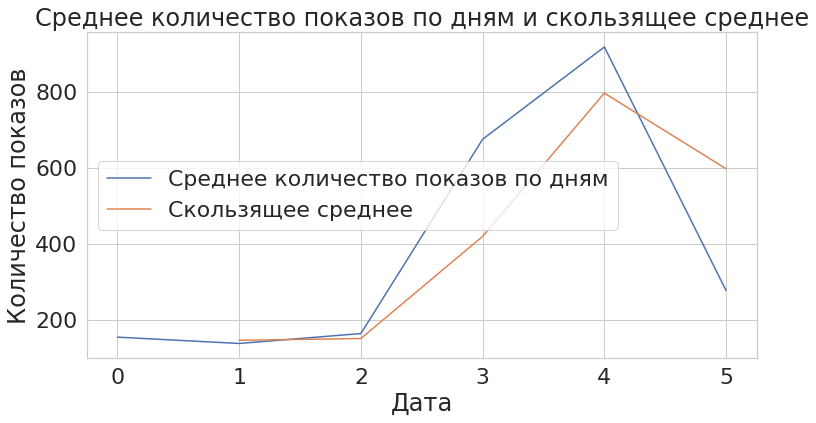

In [163]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_view_all_day['mean_view'], label='Среднее количество показов по дням')
sns.lineplot(data=mean_view_all_day['mean_view_all_day_rol'], label='Скользящее среднее')

plt.xlabel('Дата')
plt.ylabel('Количество показов')
plt.title('Среднее количество показов по дням и скользящее среднее')

plt.legend()
plt.show()

In [164]:
mean_view_all_day['razn_abs'] = abs(mean_view_all_day.event - mean_view_all_day.mean_view_all_day_rol)
mean_view_all_day

AttributeError: 'DataFrame' object has no attribute 'event'

In [130]:
max_abs = mean_view_all_day.sort_values('razn_abs', ascending = False)
max_abs.head(1) 

,date,event,mean_view_all_day_rol,razn_abs
5,2019-04-06,277.122727,598.116202,320.993475


In [131]:
# 5. Объединить данные рекламы с данными о рекламных клиентах и найти среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [132]:
# Объединяем таблицы ads_data и ads_clients_data
all_data = ads_data.merge(ads_clients_data, how = 'outer', on = 'client_union_id')
all_data.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04


In [133]:
# Проверяем типы данных в таблицах
all_data.dtypes

date_x                    object
time                      object
event                     object
platform                  object
ad_id                    float64
client_union_id            int64
campaign_union_id        float64
ad_cost_type              object
ad_cost                  float64
has_video                float64
target_audience_count    float64
date_y                    object
community_id               int64
create_date               object
dtype: object

In [134]:
# Меняем нужные столбцы на тип данных datetime
all_data['date_x'] = pd.to_datetime(all_data['date_x'])
all_data['time'] = pd.to_datetime(all_data['time'])
all_data['date_y'] = pd.to_datetime(all_data['date_y'])
all_data['create_date'] = pd.to_datetime(all_data['create_date'])

In [135]:
all_data.dtypes

date_x                   datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                           float64
client_union_id                   int64
campaign_union_id               float64
ad_cost_type                     object
ad_cost                         float64
has_video                       float64
target_audience_count           float64
date_y                   datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [136]:
# Находим разницу между датой создания кабинета и запуском рекламы
all_data['razn_days'] = all_data.date_x - all_data.create_date
all_data.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,razn_days
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04,118 days


In [137]:
# Группируем все данные по клиентам и выбираем минимальную разницу между созданием рекламного кабинета и запуском рекламы
all_data_clients = all_data.groupby('client_union_id').agg({'razn_days': 'min'}).sort_values('razn_days').reset_index()
all_data_clients.head()

,client_union_id,razn_days
0,108678,26 days
1,21194,28 days
2,38094,28 days
3,24853,28 days
4,116173,29 days


In [138]:
# Считаем среднюю разницу в днях между созданием рекламного кабинета и запуском рекламы
all_data_clients.razn_days.mean()

Timedelta('124 days 09:04:43.532219570')

In [139]:
# 6. Вычислить конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых.

In [140]:
year = pd.Timedelta(365, unit='day')

In [141]:
# все, кто запустил рекламу раньше года
zapusk_365 = all_data_clients.query("razn_days < @year")
zapusk_365.head()

,client_union_id,razn_days
0,108678,26 days
1,21194,28 days
2,38094,28 days
3,24853,28 days
4,116173,29 days


In [142]:
# Считаем конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней
round((zapusk_365.shape[0] / all_data_clients.shape[0] * 100 ), 2)

0.69

In [143]:
# 7. Посчитать, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].

In [144]:
# 1 способ
month = pd.Timedelta(30, unit='day')

In [145]:
zapusk_30 = all_data_clients.query("razn_days <= @month")
zapusk_30.head()

,client_union_id,razn_days
0,108678,26 days
1,21194,28 days
2,38094,28 days
3,24853,28 days
4,116173,29 days


In [146]:
zapusk_30.shape[0]

11

In [147]:
# 2 способ
all_data_clients['razn_days_prom'] = pd.cut(all_data_clients.razn_days, bins = pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']))
all_data_clients.head()

,client_union_id,razn_days,razn_days_prom
0,108678,26 days,"(0 days 00:00:00, 30 days 00:00:00]"
1,21194,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
2,38094,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
3,24853,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
4,116173,29 days,"(0 days 00:00:00, 30 days 00:00:00]"


In [148]:
all_data_clients.value_counts('razn_days_prom')

razn_days_prom
(90 days 00:00:00, 180 days 00:00:00]     396
(30 days 00:00:00, 90 days 00:00:00]      263
(180 days 00:00:00, 365 days 00:00:00]    168
(0 days 00:00:00, 30 days 00:00:00]        11
dtype: int64

In [151]:
# 8. Построить барплот, на котором будут показаны категории с количеством уникальных клиентов в них.

In [152]:
# Используем данные из 2 способа для построения барплота
prom = all_data_clients.groupby('razn_days_prom', as_index=False).agg({'razn_days_prom': 'count'}).rename(columns={'razn_days_prom': 'kol_vo'}).reset_index()
prom = prom.rename(index={0: "0 - 30", 1: "30 - 90", 2: "90 - 180", 3: "180 - 365"})
prom

,index,kol_vo
0 - 30,0,11
30 - 90,1,263
90 - 180,2,396
180 - 365,3,168


In [153]:
px.bar(x=prom.index, y=prom.kol_vo, text=prom.kol_vo)